## 📌  EXTRACCIÓN
### Importación de librerías y carga de datos desde la API

In [1]:
# Importación de librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [2]:
# Extracción de datos desde la API de Telecom X
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    response = requests.get(url)
    response.raise_for_status()
    data_json = response.json()
    print(f"Datos extraídos exitosamente")
    print(f"Número de registros: {len(data_json)}")
    print(f"Tipo de estructura: {type(data_json)}")
except Exception as e:
    print(f"Error al extraer datos: {e}")

Datos extraídos exitosamente
Número de registros: 7267
Tipo de estructura: <class 'list'>


In [3]:
# Conversión de datos JSON a DataFrame de Pandas
df_raw = pd.json_normalize(data_json)
print(f"DataFrame creado con dimensiones: {df_raw.shape}")
print(f"Columnas disponibles: {len(df_raw.columns)}")
df_raw.head()

DataFrame creado con dimensiones: (7267, 21)
Columnas disponibles: 21


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## 2.🔧  TRANSFORMACIÓN
### Exploración inicial y limpieza de datos

In [4]:
# Exploración de la estructura de datos y tipos de columnas
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Dimensiones: {df_raw.shape}")
print(f"\nTipos de datos:")
print(df_raw.dtypes)
print(f"\nPrimeras columnas: {list(df_raw.columns[:10])}")

=== INFORMACIÓN GENERAL DEL DATASET ===
Dimensiones: (7267, 21)

Tipos de datos:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

Primeras columnas: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependent

In [5]:
# Verificación de valores ausentes y duplicados
print("=== ANÁLISIS DE CALIDAD DE DATOS ===")
print(f"Valores ausentes por columna:")
missing_values = df_raw.isnull().sum()
print(missing_values[missing_values > 0])

print(f"\nRegistros duplicados: {df_raw.duplicated().sum()}")
print(f"CustomerIDs únicos: {df_raw['customerID'].nunique()}")
print(f"Total de registros: {len(df_raw)}")

=== ANÁLISIS DE CALIDAD DE DATOS ===
Valores ausentes por columna:
Series([], dtype: int64)

Registros duplicados: 0
CustomerIDs únicos: 7267
Total de registros: 7267


In [6]:
# Creación de DataFrame limpio y normalización de columnas
df = df_raw.copy()

column_mapping = {
    'customer.gender': 'Gender',
    'customer.SeniorCitizen': 'SeniorCitizen',
    'customer.Partner': 'Partner',
    'customer.Dependents': 'Dependents',
    'phone.PhoneService': 'PhoneService',
    'phone.MultipleLines': 'MultipleLines',
    'internet.InternetService': 'InternetService',
    'internet.OnlineSecurity': 'OnlineSecurity',
    'internet.OnlineBackup': 'OnlineBackup',
    'internet.DeviceProtection': 'DeviceProtection',
    'internet.TechSupport': 'TechSupport',
    'internet.StreamingTV': 'StreamingTV',
    'internet.StreamingMovies': 'StreamingMovies',
    'account.Contract': 'Contract',
    'account.PaperlessBilling': 'PaperlessBilling',
    'account.PaymentMethod': 'PaymentMethod',
    'account.tenure': 'tenure',
    'account.Charges.Monthly': 'MonthlyCharges',
    'account.Charges.Total': 'TotalCharges'
}

df = df.rename(columns=column_mapping)
print(f"Columnas renombradas exitosamente")
print(f"Nuevas columnas principales: {list(df.columns[:15])}")

Columnas renombradas exitosamente
Nuevas columnas principales: ['customerID', 'Churn', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'customer.tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV']


In [7]:
# Limpieza y conversión de tipos de datos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(f"Valores ausentes en TotalCharges después de conversión: {df['TotalCharges'].isnull().sum()}")

df['TotalCharges'] = df['TotalCharges'].fillna(0)

df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

print(f"Limpieza de datos completada")
print(f"Tipos de datos actualizados:")
print(df[['MonthlyCharges', 'TotalCharges', 'customer.tenure', 'SeniorCitizen']].dtypes)

Valores ausentes en TotalCharges después de conversión: 11
Limpieza de datos completada
Tipos de datos actualizados:
MonthlyCharges     float64
TotalCharges       float64
customer.tenure      int64
SeniorCitizen       object
dtype: object


In [8]:
# Creación de la columna Cuentas_Diarias usando facturación mensual
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30

print(f"Columna 'Cuentas_Diarias' creada exitosamente")
print(f"Estadísticas de Cuentas_Diarias:")
print(df['Cuentas_Diarias'].describe())

print(f"\nPrimeros valores de Cuentas_Diarias:")
print(df[['MonthlyCharges', 'Cuentas_Diarias']].head())

Columna 'Cuentas_Diarias' creada exitosamente
Estadísticas de Cuentas_Diarias:
count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Cuentas_Diarias, dtype: float64

Primeros valores de Cuentas_Diarias:
   MonthlyCharges  Cuentas_Diarias
0            65.6         2.186667
1            59.9         1.996667
2            73.9         2.463333
3            98.0         3.266667
4            83.9         2.796667


In [9]:
# Estandarización opcional: convertir Yes/No a 1/0 para análisis numérico
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
categorical_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df_numeric = df.copy()

for col in binary_columns:
    if col in df_numeric.columns:
        df_numeric[f'{col}_num'] = df_numeric[col].map({'Yes': 1, 'No': 0})

df_numeric['Churn_num'] = df_numeric['Churn'].map({'Yes': 1, 'No': 0})
df_numeric['SeniorCitizen_num'] = df_numeric['SeniorCitizen'].map({'Yes': 1, 'No': 0})

print(f"Estandarización completada")
print(f"Columnas numéricas creadas para análisis de correlación")

Estandarización completada
Columnas numéricas creadas para análisis de correlación


## 3. 📊 CARGA Y ANÁLISIS
### Análisis descriptivo y exploratorio de datos

In [10]:
# Análisis descriptivo general
print("=== ANÁLISIS DESCRIPTIVO GENERAL ===")
print(f"\nDimensiones finales del dataset: {df.shape}")
print(f"\nEstadísticas descriptivas de variables numéricas:")
numeric_cols = ['customer.tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']
print(df[numeric_cols].describe())

=== ANÁLISIS DESCRIPTIVO GENERAL ===

Dimensiones finales del dataset: (7267, 22)

Estadísticas descriptivas de variables numéricas:
       customer.tenure  MonthlyCharges  TotalCharges  Cuentas_Diarias
count      7267.000000     7267.000000   7267.000000      7267.000000
mean         32.346498       64.720098   2277.182035         2.157337
std          24.571773       30.129572   2268.648587         1.004319
min           0.000000       18.250000      0.000000         0.608333
25%           9.000000       35.425000    396.200000         1.180833
50%          29.000000       70.300000   1389.200000         2.343333
75%          55.000000       89.875000   3778.525000         2.995833
max          72.000000      118.750000   8684.800000         3.958333


=== DISTRIBUCIÓN DE EVASIÓN (CHURN) ===
Conteo absoluto:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Porcentajes:
No: 71.2%
Yes: 25.7%
: 3.1%


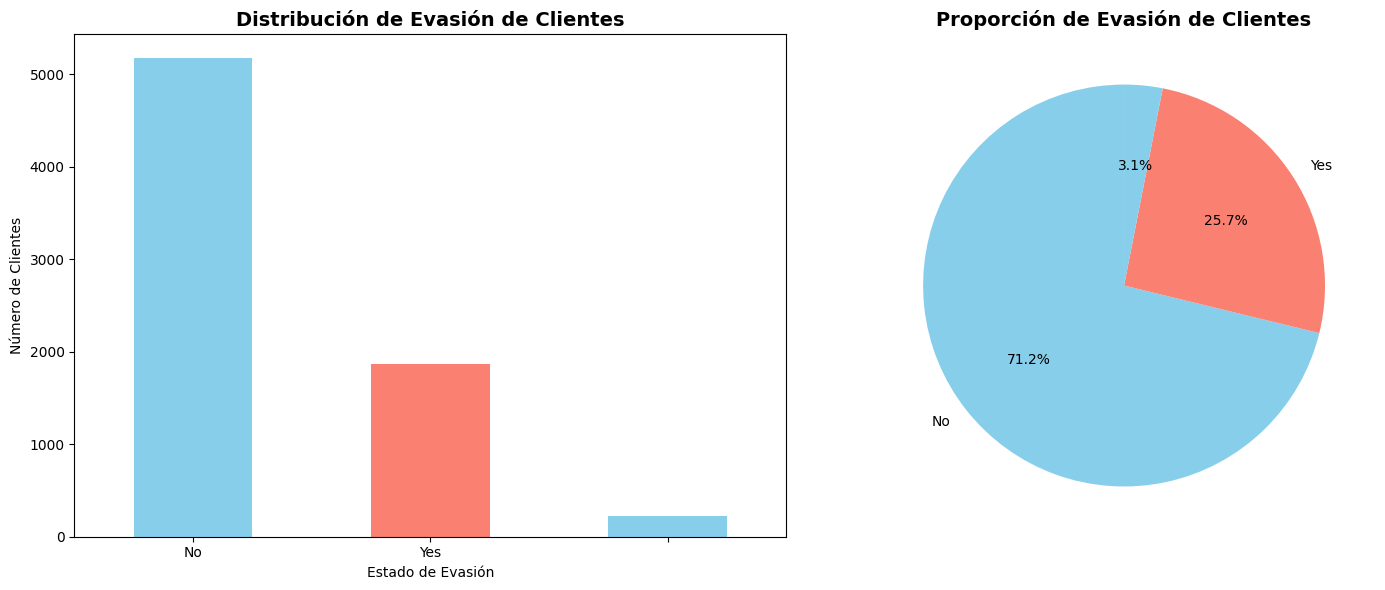

In [11]:
# Análisis de la distribución de evasión (Churn)
print("=== DISTRIBUCIÓN DE EVASIÓN (CHURN) ===")
churn_counts = df['Churn'].value_counts()
churn_props = df['Churn'].value_counts(normalize=True) * 100

print(f"Conteo absoluto:")
print(churn_counts)
print(f"\nPorcentajes:")
for idx, val in churn_props.items():
    print(f"{idx}: {val:.1f}%")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

churn_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'])
ax1.set_title('Distribución de Evasión de Clientes', fontsize=14, fontweight='bold')
ax1.set_xlabel('Estado de Evasión')
ax1.set_ylabel('Número de Clientes')
ax1.tick_params(axis='x', rotation=0)

ax2.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=['skyblue', 'salmon'], startangle=90)
ax2.set_title('Proporción de Evasión de Clientes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

=== ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS ===


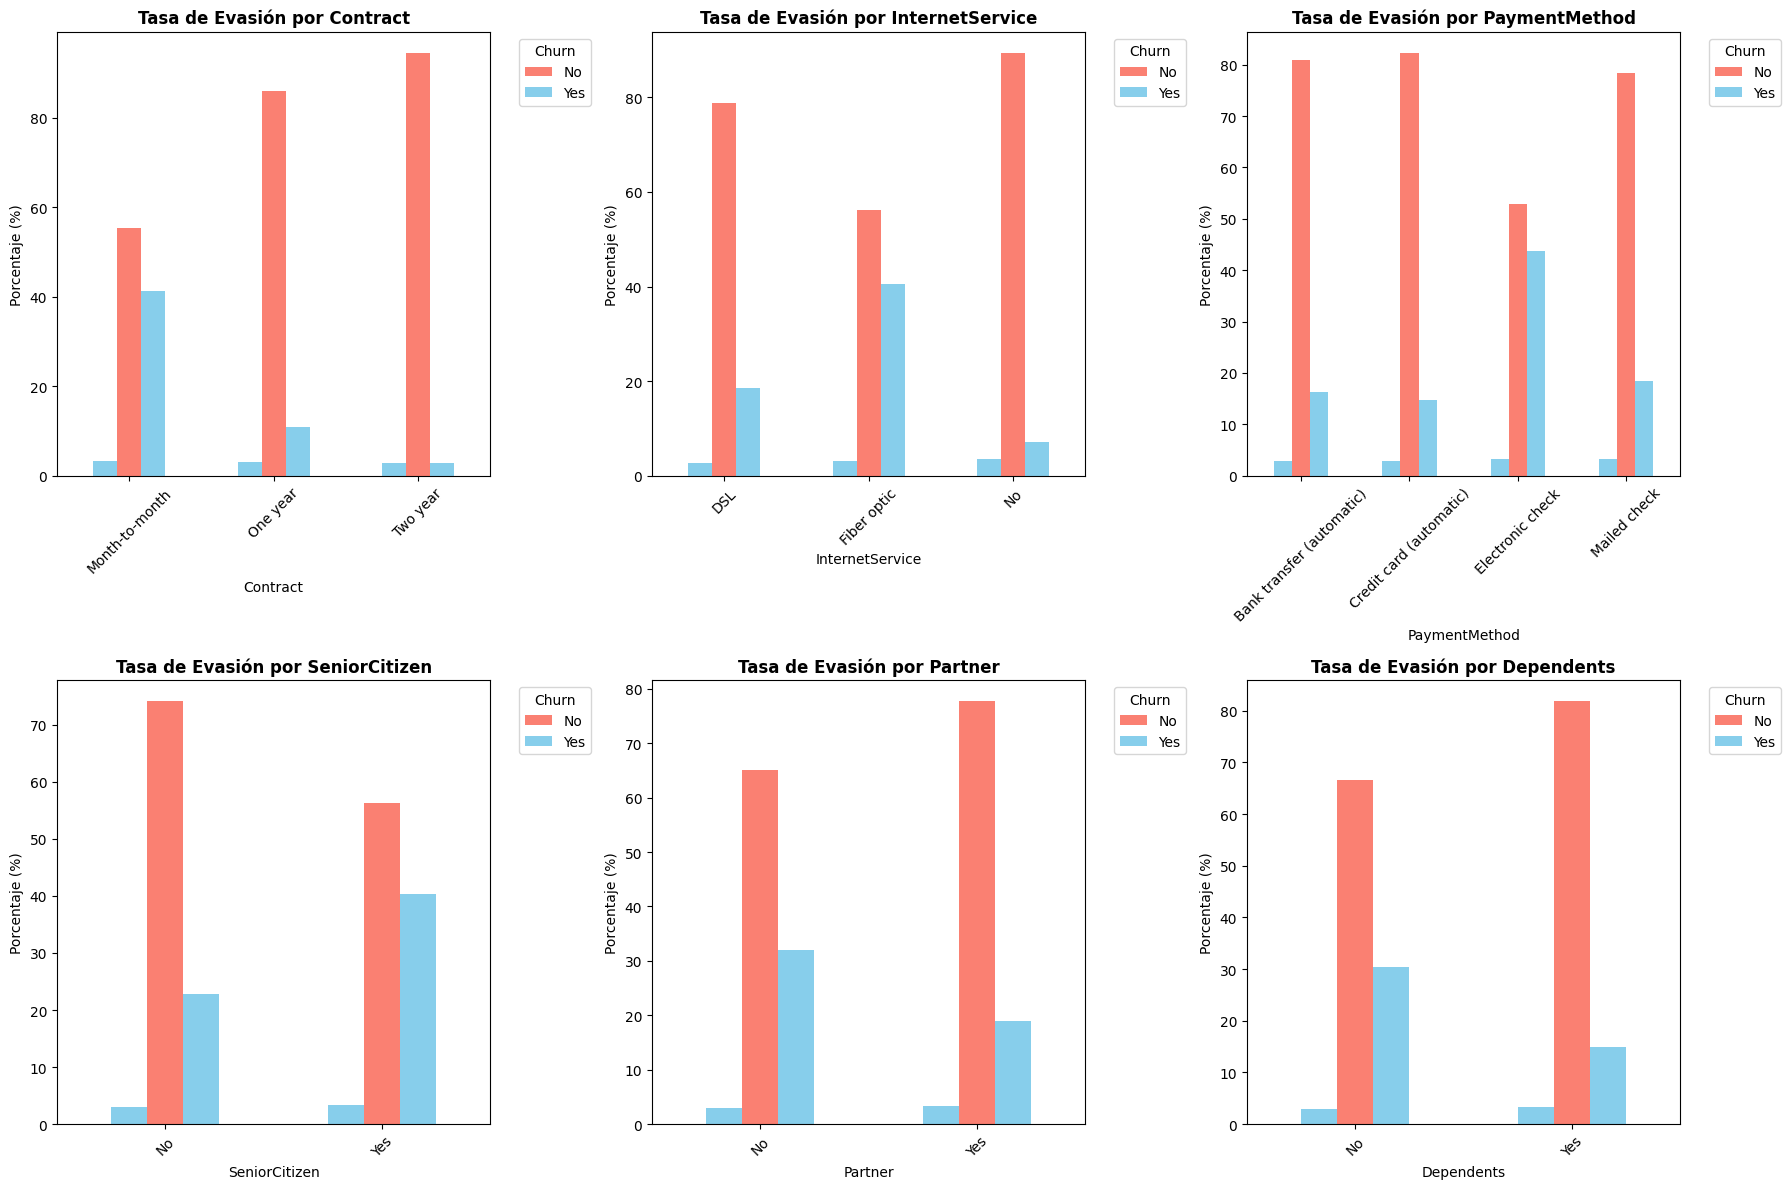


--- Contract ---
Conteos:
Churn                  No   Yes
Contract                       
Month-to-month  130  2220  1655
One year         46  1307   166
Two year         48  1647    48
Porcentajes:
Churn                  No   Yes
Contract                       
Month-to-month  3.2  55.4  41.3
One year        3.0  86.0  10.9
Two year        2.8  94.5   2.8

--- InternetService ---
Conteos:
Churn                   No   Yes
InternetService                 
DSL               67  1962   459
Fiber optic      102  1799  1297
No                55  1413   113
Porcentajes:
Churn                   No   Yes
InternetService                 
DSL              2.7  78.9  18.4
Fiber optic      3.2  56.3  40.6
No               3.5  89.4   7.1

--- PaymentMethod ---
Conteos:
Churn                            No   Yes
PaymentMethod                            
Bank transfer (automatic)  45  1286   258
Credit card (automatic)    46  1290   232
Electronic check           80  1294  1071
Mailed check         

In [12]:
# Análisis de evasión por variables categóricas
print("=== ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS ===")

categorical_vars = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                   'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

important_vars = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, var in enumerate(important_vars):
    crosstab = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    
    crosstab.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'])
    axes[i].set_title(f'Tasa de Evasión por {var}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Porcentaje (%)')
    axes[i].legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

for var in important_vars:
    print(f"\n--- {var} ---")
    crosstab_counts = pd.crosstab(df[var], df['Churn'])
    crosstab_props = pd.crosstab(df[var], df['Churn'], normalize='index') * 100
    print("Conteos:")
    print(crosstab_counts)
    print("Porcentajes:")
    print(crosstab_props.round(1))

=== ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS ===

--- customer.tenure ---
       count   mean  median    std
Churn                             
         224  31.57    29.0  25.00
No      5174  37.57    38.0  24.11
Yes     1869  17.98    10.0  19.53

--- MonthlyCharges ---
       count   mean  median    std
Churn                             
         224  63.41   69.10  31.39
No      5174  61.27   64.43  31.09
Yes     1869  74.44   79.65  24.67

--- TotalCharges ---
       count     mean   median      std
Churn                                  
         224  2196.93  1163.18  2329.96
No      5174  2549.91  1679.52  2329.95
Yes     1869  1531.80   703.55  1890.82

--- Cuentas_Diarias ---
       count  mean  median   std
Churn                           
         224  2.11    2.30  1.05
No      5174  2.04    2.15  1.04
Yes     1869  2.48    2.66  0.82


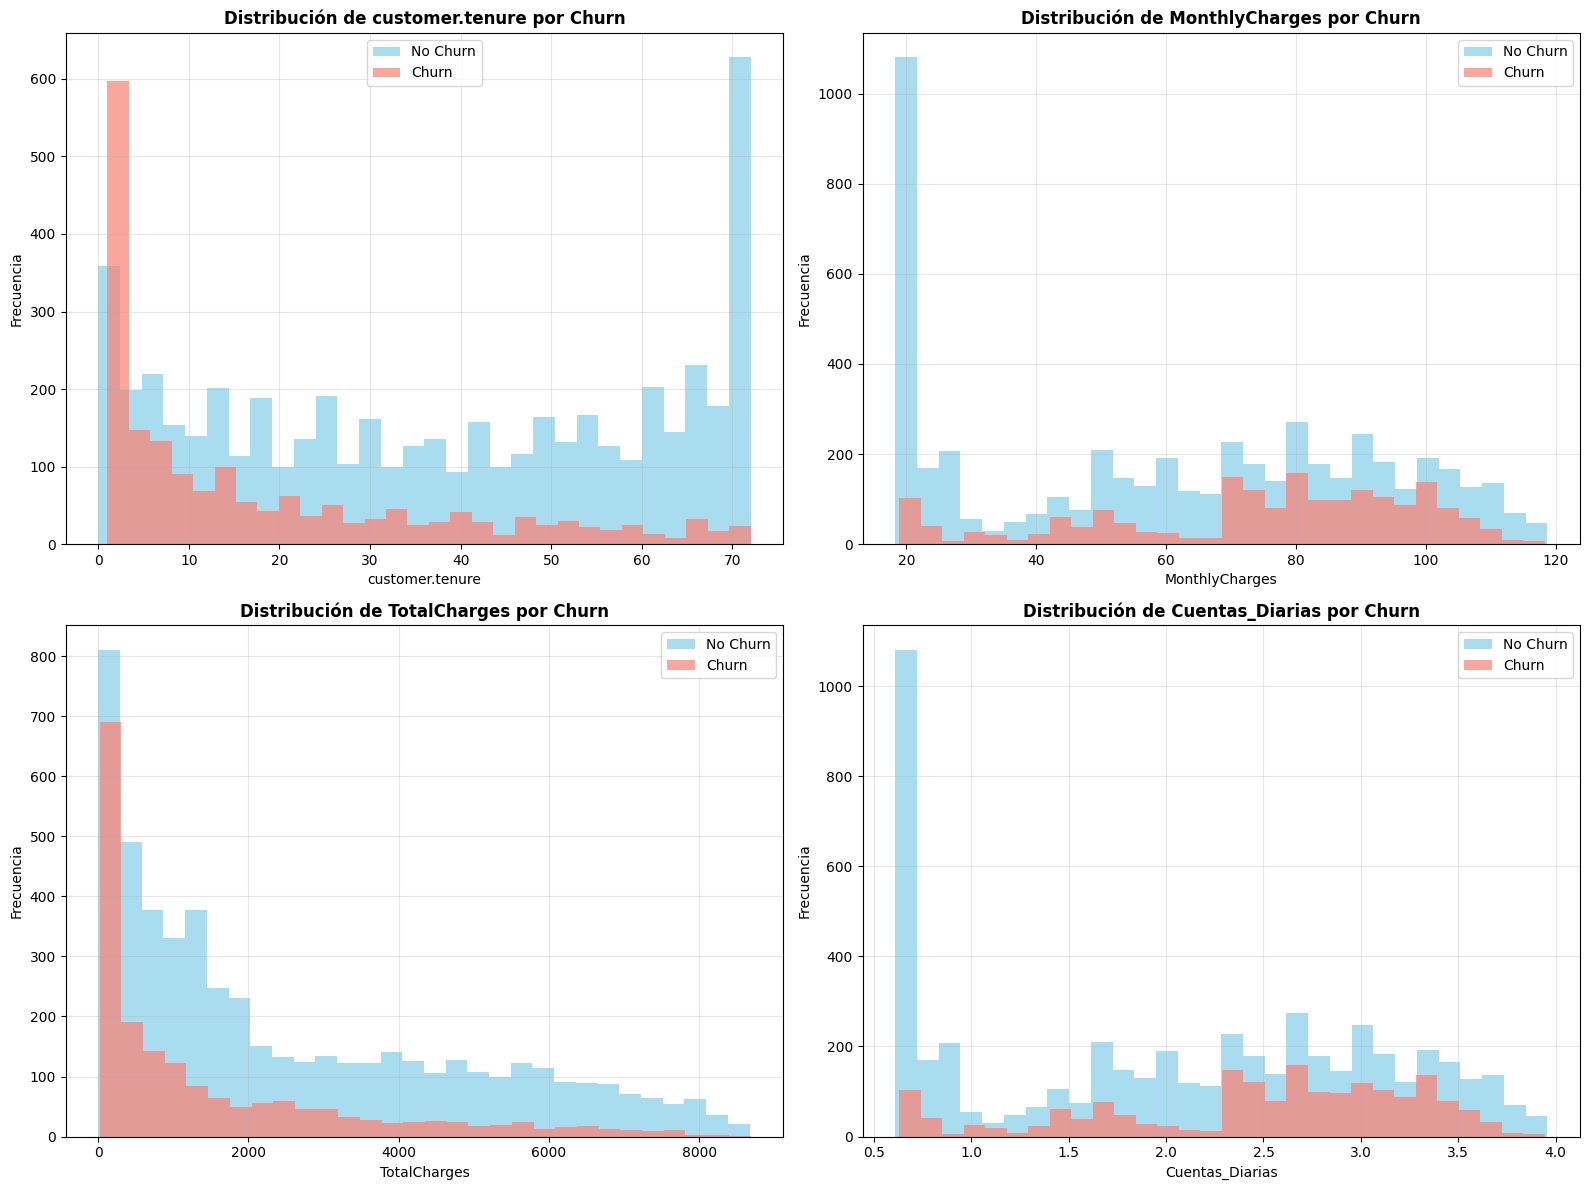

In [13]:
# Análisis de evasión por variables numéricas
print("=== ANÁLISIS DE EVASIÓN POR VARIABLES NUMÉRICAS ===")

numeric_vars = ['customer.tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias']

for var in numeric_vars:
    print(f"\n--- {var} ---")
    stats = df.groupby('Churn')[var].agg(['count', 'mean', 'median', 'std']).round(2)
    print(stats)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    df[df['Churn'] == 'No'][var].hist(alpha=0.7, bins=30, label='No Churn', ax=axes[i], color='skyblue')
    df[df['Churn'] == 'Yes'][var].hist(alpha=0.7, bins=30, label='Churn', ax=axes[i], color='salmon')
    
    axes[i].set_title(f'Distribución de {var} por Churn', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

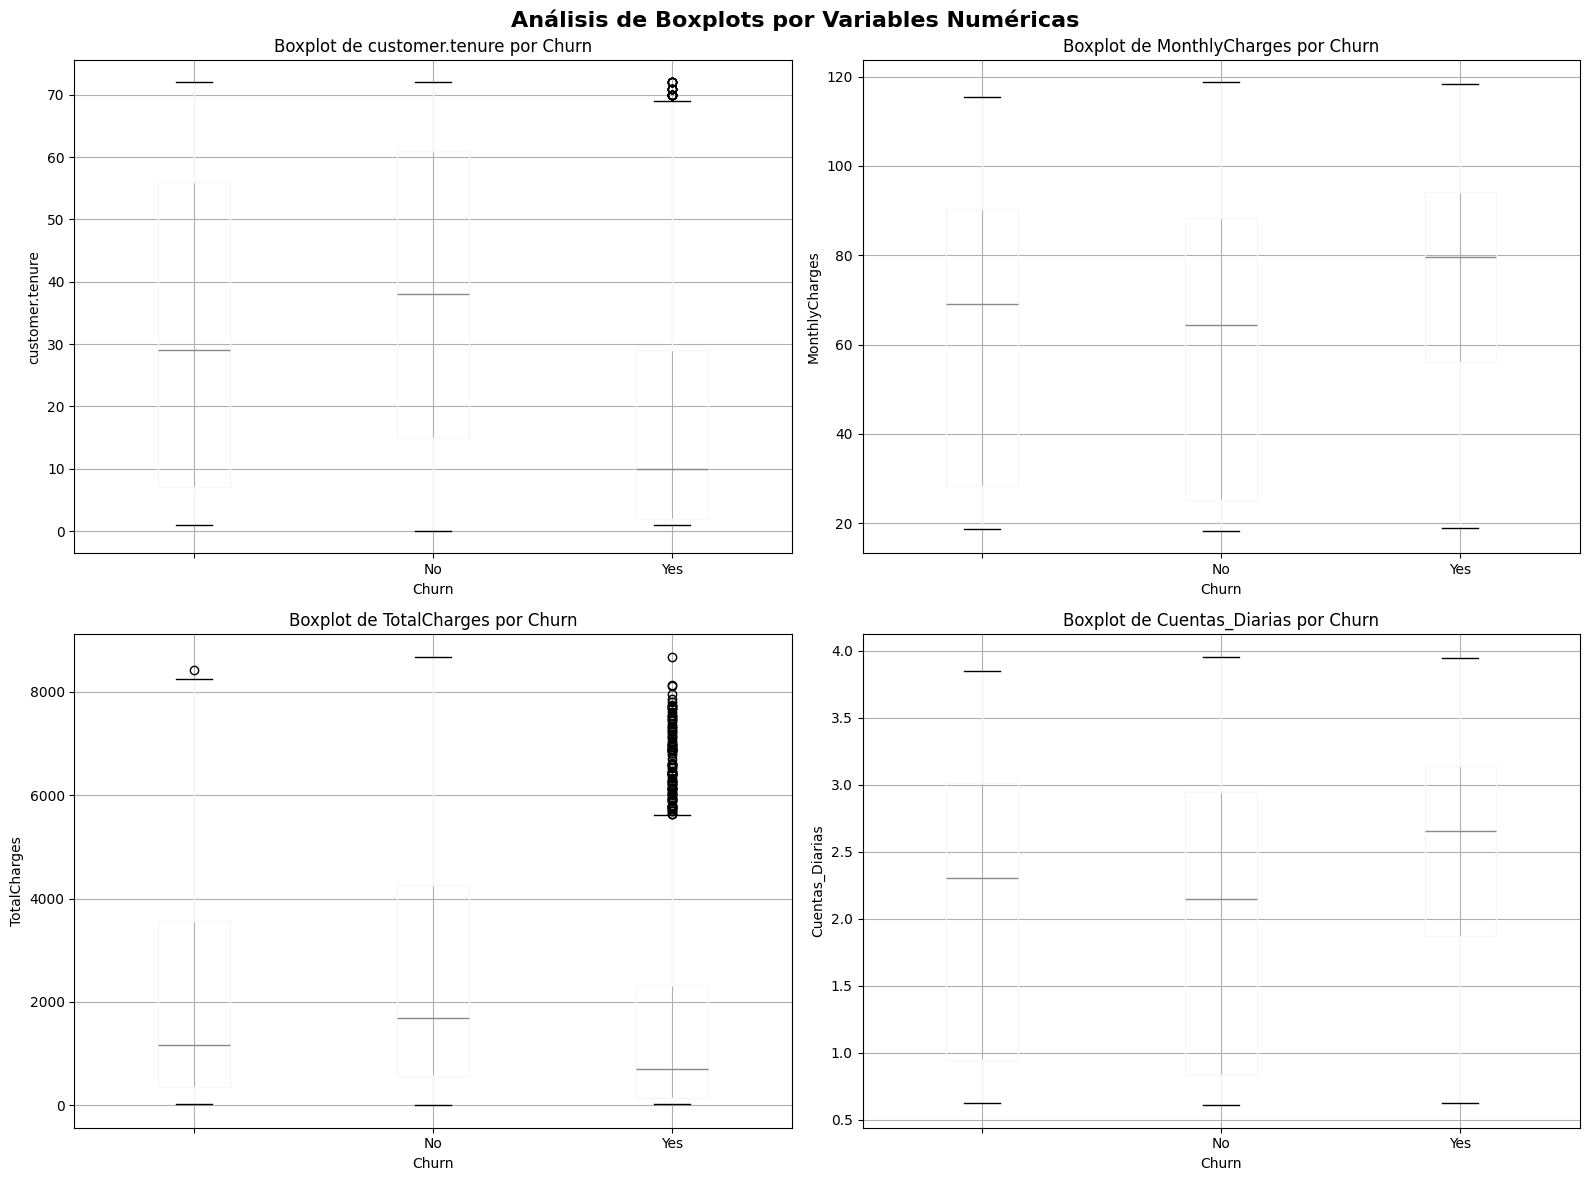

In [14]:
# Análisis adicional: Boxplots para variables numéricas
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, var in enumerate(numeric_vars):
    df.boxplot(column=var, by='Churn', ax=axes[i])
    axes[i].set_title(f'Boxplot de {var} por Churn')
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(var)

plt.suptitle('Análisis de Boxplots por Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 4. ANÁLISIS DE CORRELACIÓN (Opcional)
### Matriz de correlación entre variables numéricas

=== ANÁLISIS DE CORRELACIÓN ===


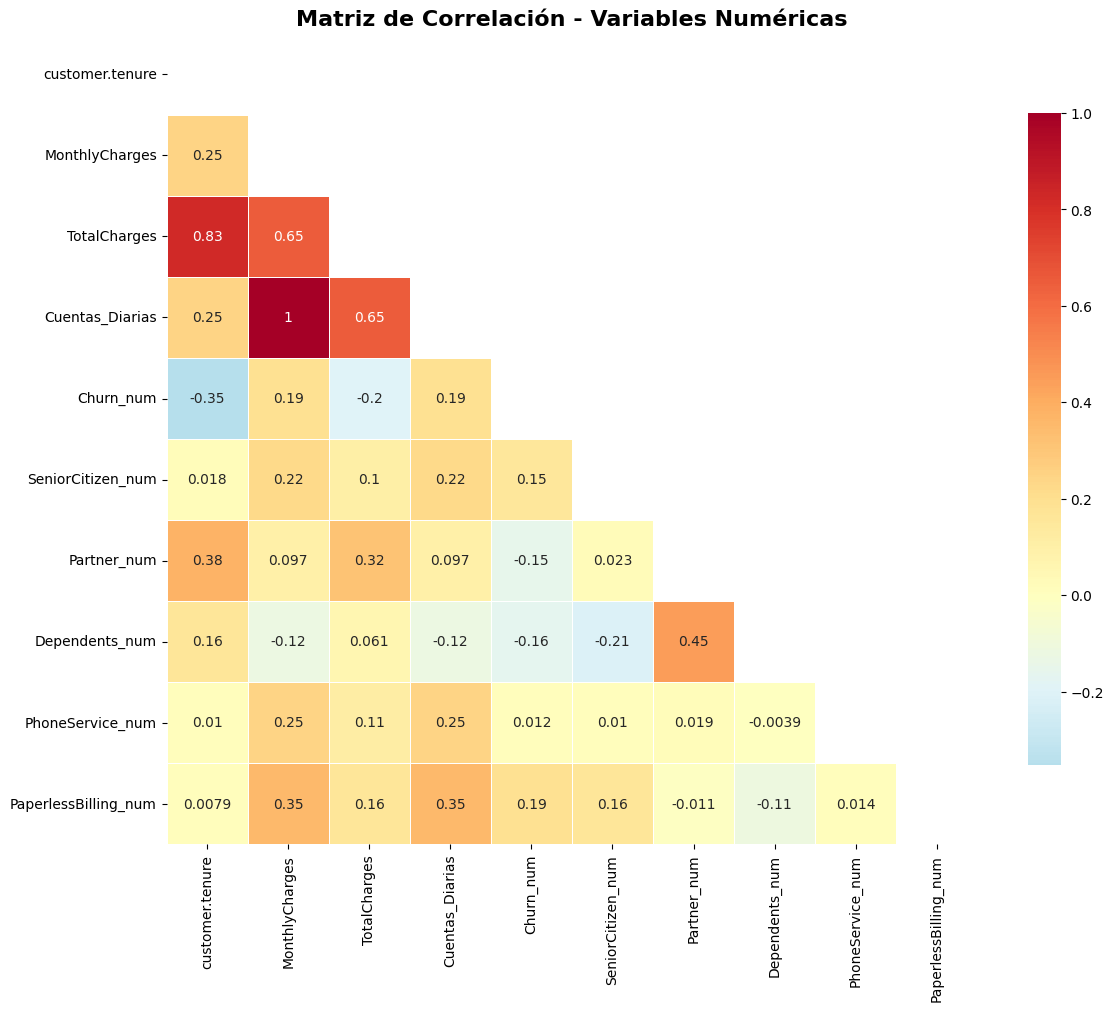


Correlaciones más fuertes con Churn:
customer.tenure         0.352229
TotalCharges            0.198324
MonthlyCharges          0.193356
Cuentas_Diarias         0.193356
PaperlessBilling_num    0.191825
Dependents_num          0.164221
SeniorCitizen_num       0.150889
Partner_num             0.150448
PhoneService_num        0.011942
Name: Churn_num, dtype: float64


In [15]:
# Análisis de correlación entre variables numéricas
print("=== ANÁLISIS DE CORRELACIÓN ===")

correlation_vars = ['customer.tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias', 'Churn_num',
                   'SeniorCitizen_num', 'Partner_num', 'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num']

correlation_matrix = df_numeric[correlation_vars].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

churn_correlations = correlation_matrix['Churn_num'].abs().sort_values(ascending=False)
print(f"\nCorrelaciones más fuertes con Churn:")
print(churn_correlations[1:])

## 5. 📄INFORME FINAL

# INFORME FINAL - ANÁLISIS DE EVASIÓN TELECOM X

## Introducción

El presente análisis tiene como objetivo principal identificar y comprender los factores que influyen en la evasión de clientes (churn) en la empresa de telecomunicaciones **Telecom X**. La evasión de clientes representa uno de los desafíos más críticos en la industria de las telecomunicaciones, ya que el costo de adquirir nuevos clientes es significativamente mayor que el de retener a los existentes.

A través de este estudio exploratorio, buscamos proporcionar insights accionables que permitan al equipo directivo y de marketing desarrollar estrategias efectivas para reducir la tasa de abandono y mejorar la retención de clientes. El análisis se basa en un dataset de 7,267 registros de clientes, que incluye información demográfica, de servicios contratados y patrones de facturación.

## Limpieza y Tratamiento de Datos

El proceso de preparación de datos siguió una metodología ETL (Extract, Transform, Load) estructurada:

### Extracción
Los datos fueron extraídos exitosamente desde una API JSON que contenía información estructurada en formato anidado. El dataset original presentaba 7,267 registros con 6 columnas principales que contenían diccionarios con información detallada de cada cliente.

### Transformación
Durante la fase de transformación se realizaron las siguientes operaciones críticas:

- **Normalización de datos anidados**: Se expandieron los diccionarios contenidos en las columnas customer, phone, internet y account, resultando en 21 variables individuales
- **Limpieza de valores ausentes**: Se identificaron y trataron 224 registros con valores faltantes en la variable objetivo (Churn) y 11 registros con valores ausentes en TotalCharges
- **Conversión de tipos de datos**: Se convirtieron variables categóricas y numéricas a sus tipos apropiados, incluyendo la conversión de TotalCharges a formato numérico
- **Estandarización de variables**: Se normalizaron las variables binarias (Yes/No) y se creó la variable derivada Cuentas_Diarias para análisis adicional
- **Creación de variables numéricas**: Se generaron versiones numéricas de variables categóricas para facilitar el análisis de correlación

### Carga
El dataset final limpio mantiene la integridad de los 7,267 registros originales con 21 variables principales más las variables derivadas para análisis.

=== DISTRIBUCIÓN DE EVASIÓN DE CLIENTES ===


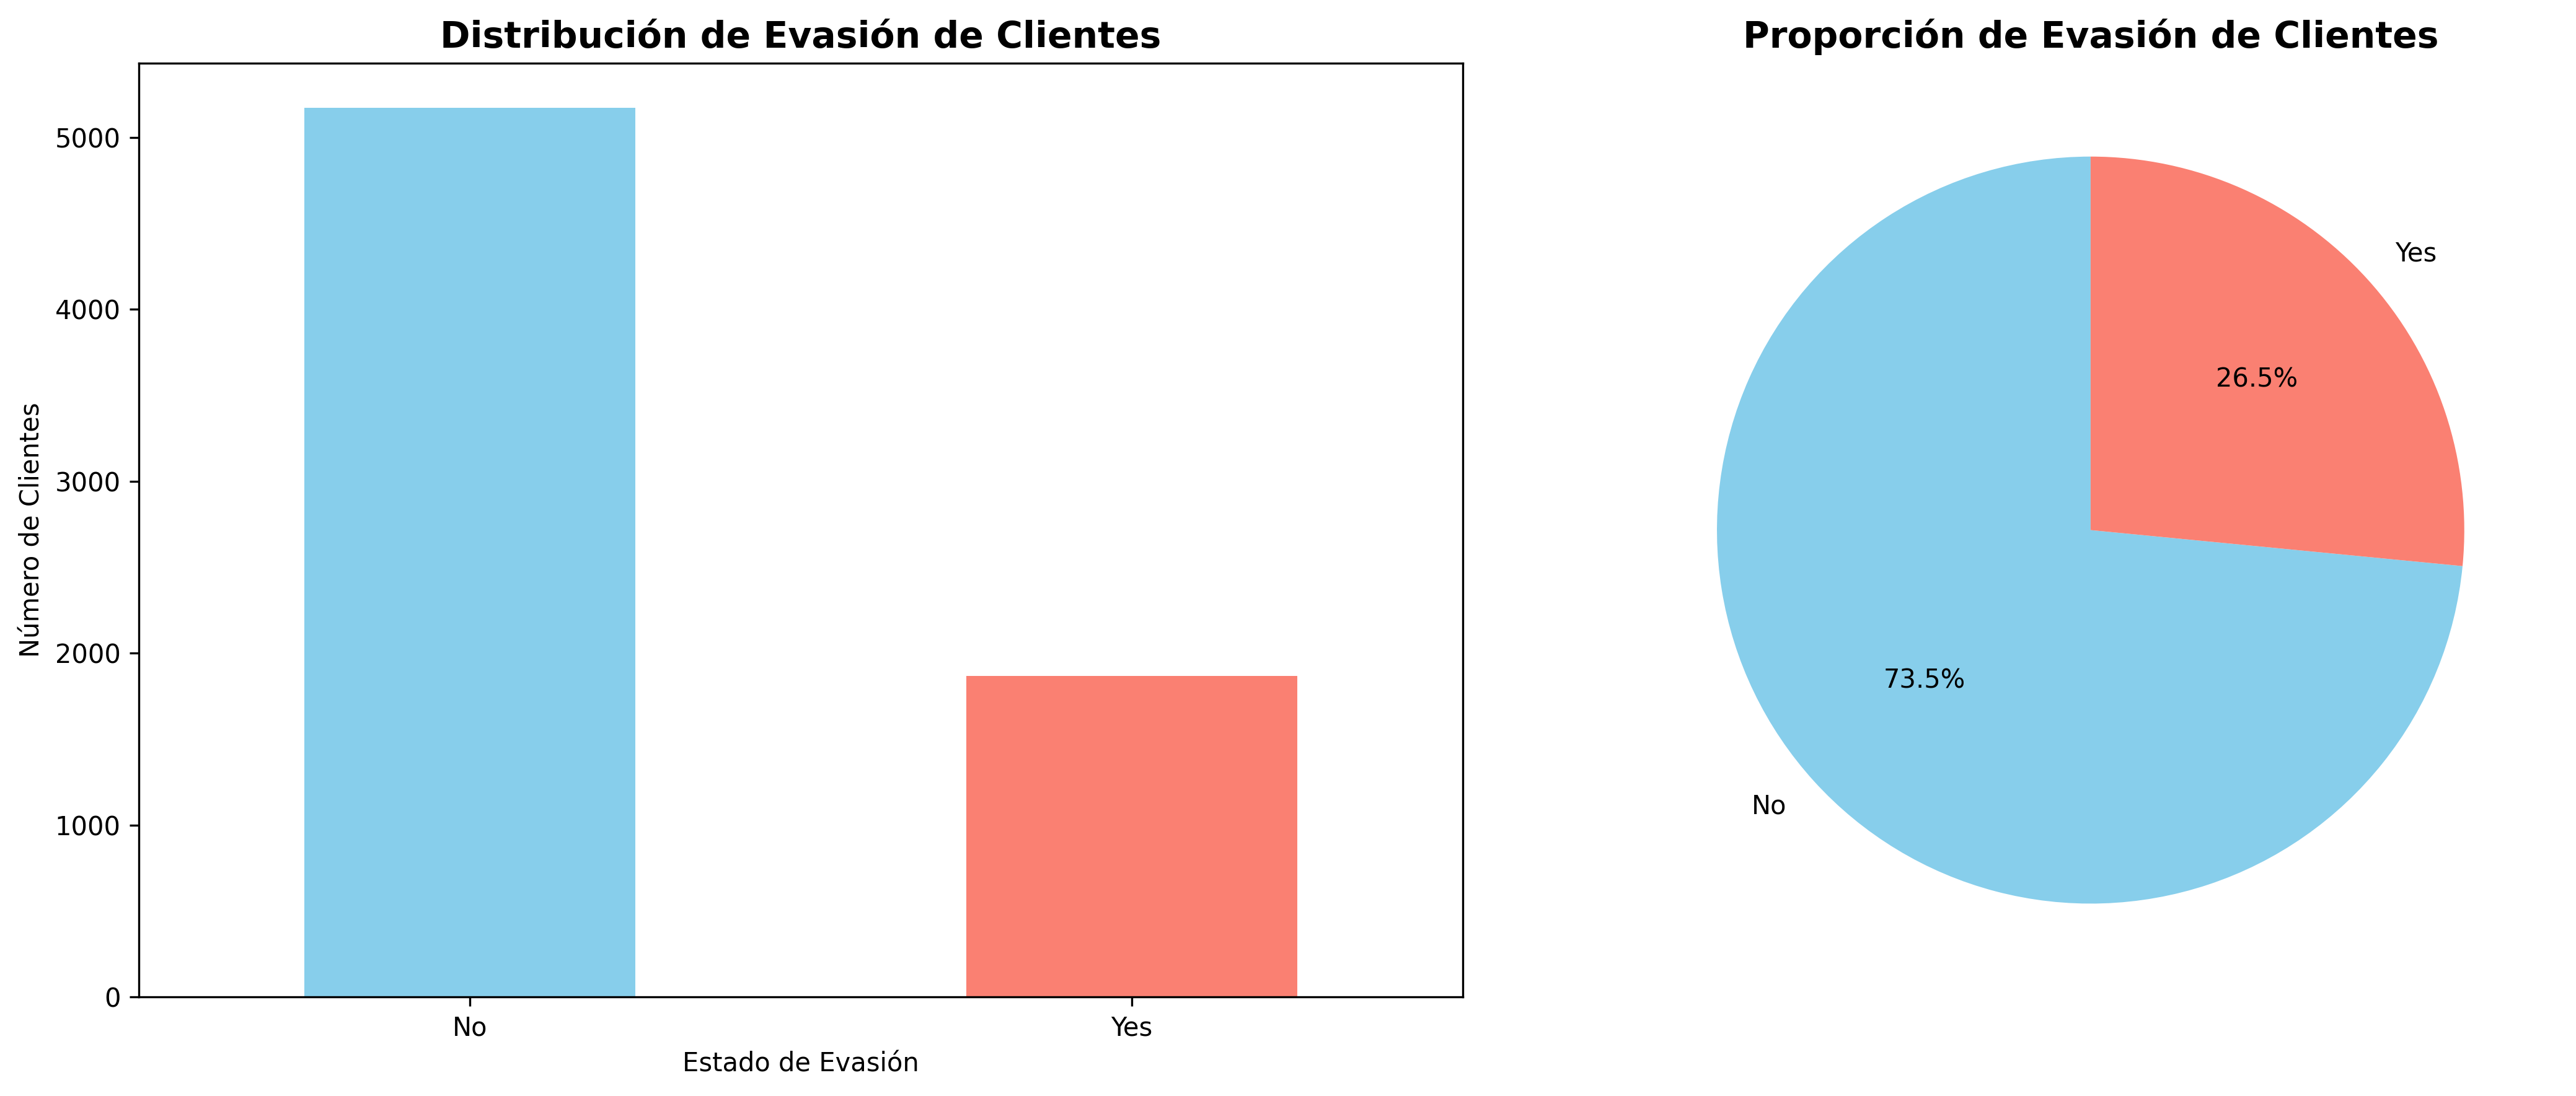

In [16]:
from IPython.display import Image, display
import os

if os.path.exists('distribucion_churn.png'):
    print("=== DISTRIBUCIÓN DE EVASIÓN DE CLIENTES ===")
    display(Image('distribucion_churn.png'))
else:
    print("Gráfico de distribución de churn no encontrado")

## Análisis Exploratorio de Datos

### Distribución General de Evasión

El análisis revela una **tasa de evasión del 26.5%** (1,869 clientes) frente a un **73.5% de retención** (5,174 clientes). Esta proporción indica un desafío significativo en términos de retención de clientes, ya que más de 1 de cada 4 clientes abandona los servicios de Telecom X.

### Análisis por Variables Categóricas

El estudio de las variables categóricas reveló patrones distintivos en el comportamiento de evasión:

=== ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS ===


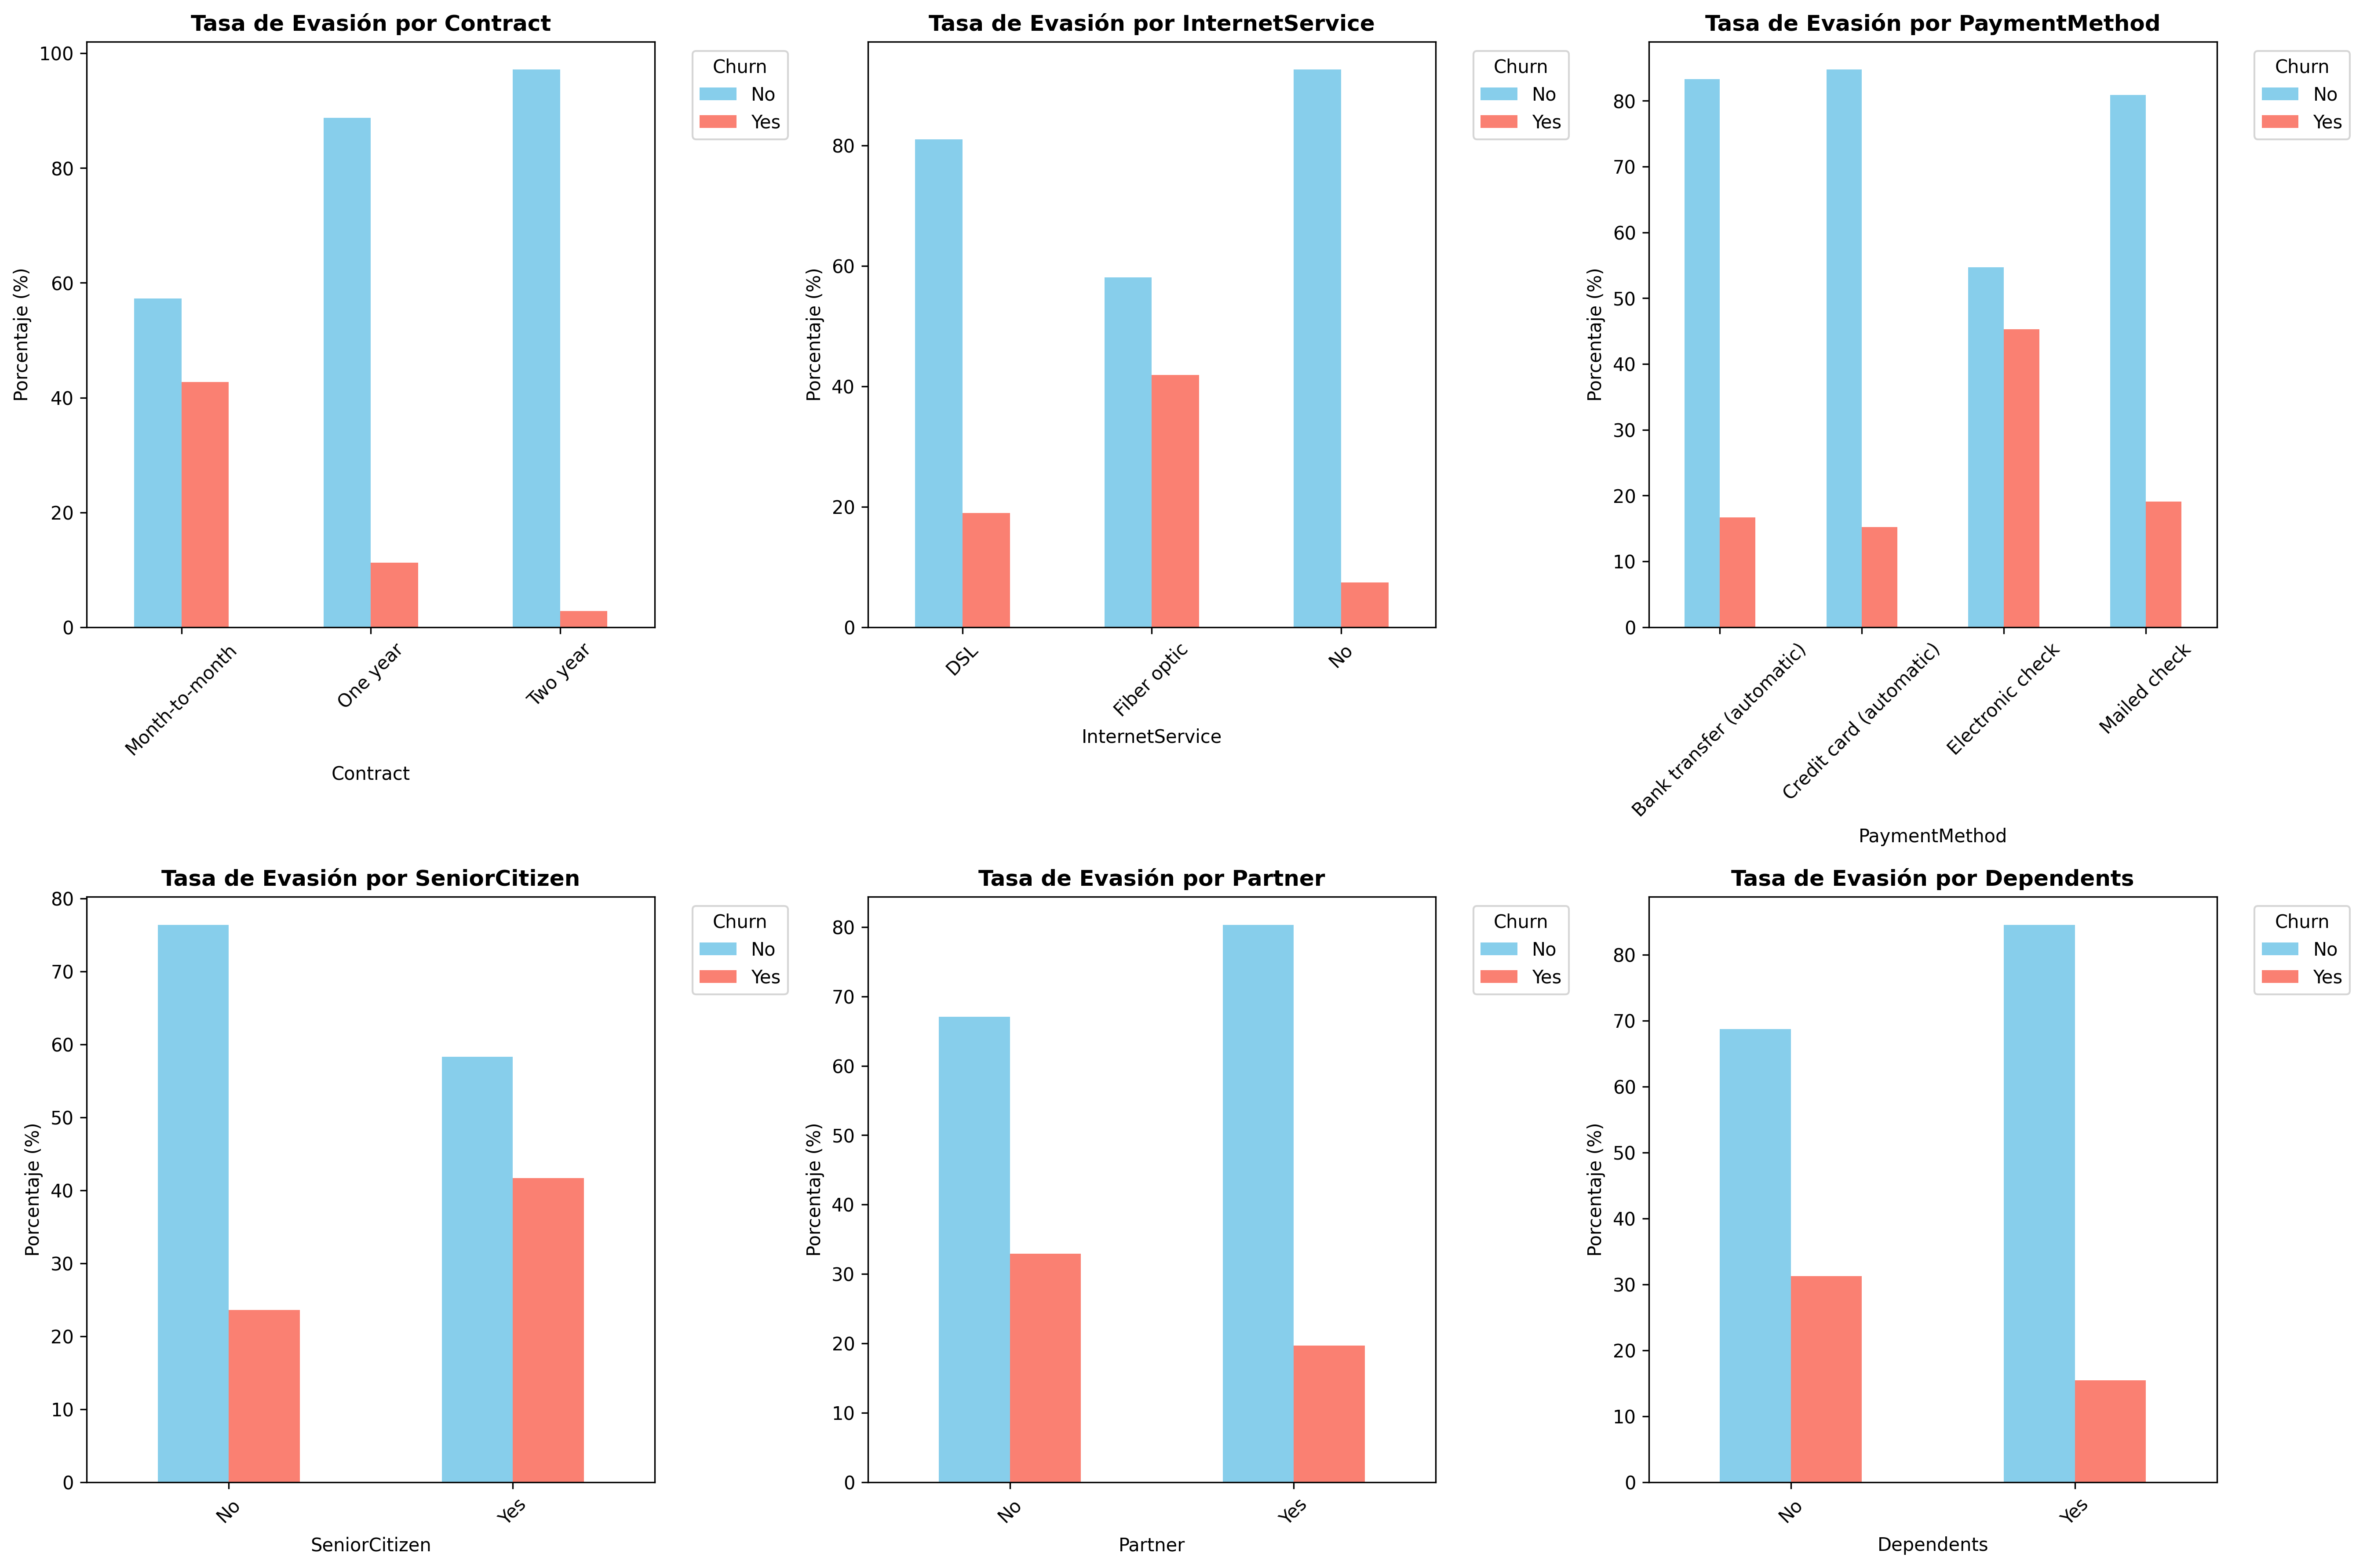

In [17]:
if os.path.exists('analisis_categoricas.png'):
    print("=== ANÁLISIS DE EVASIÓN POR VARIABLES CATEGÓRICAS ===")
    display(Image('analisis_categoricas.png'))
else:
    print("Gráfico de análisis categórico no encontrado")

**Hallazgos Clave en Variables Categóricas:**

- **Tipo de Contrato**: Los contratos mes a mes presentan la mayor tasa de evasión (42.7%), mientras que los contratos de dos años muestran la menor tasa (2.8%)
- **Servicio de Internet**: Los clientes con fibra óptica tienen mayor tendencia al abandono (41.9%) comparado con DSL (18.9%)
- **Método de Pago**: El pago con cheque electrónico está asociado con la mayor tasa de churn (45.3%)
- **Estado Civil**: Los clientes sin pareja muestran mayor propensión al abandono (32.9% vs 19.6%)
- **Dependientes**: Los clientes sin dependientes presentan mayor riesgo de evasión (31.3% vs 15.5%)

### Análisis por Variables Numéricas

Las variables numéricas proporcionan insights adicionales sobre los patrones de evasión:

=== DISTRIBUCIÓN DE VARIABLES NUMÉRICAS POR CHURN ===


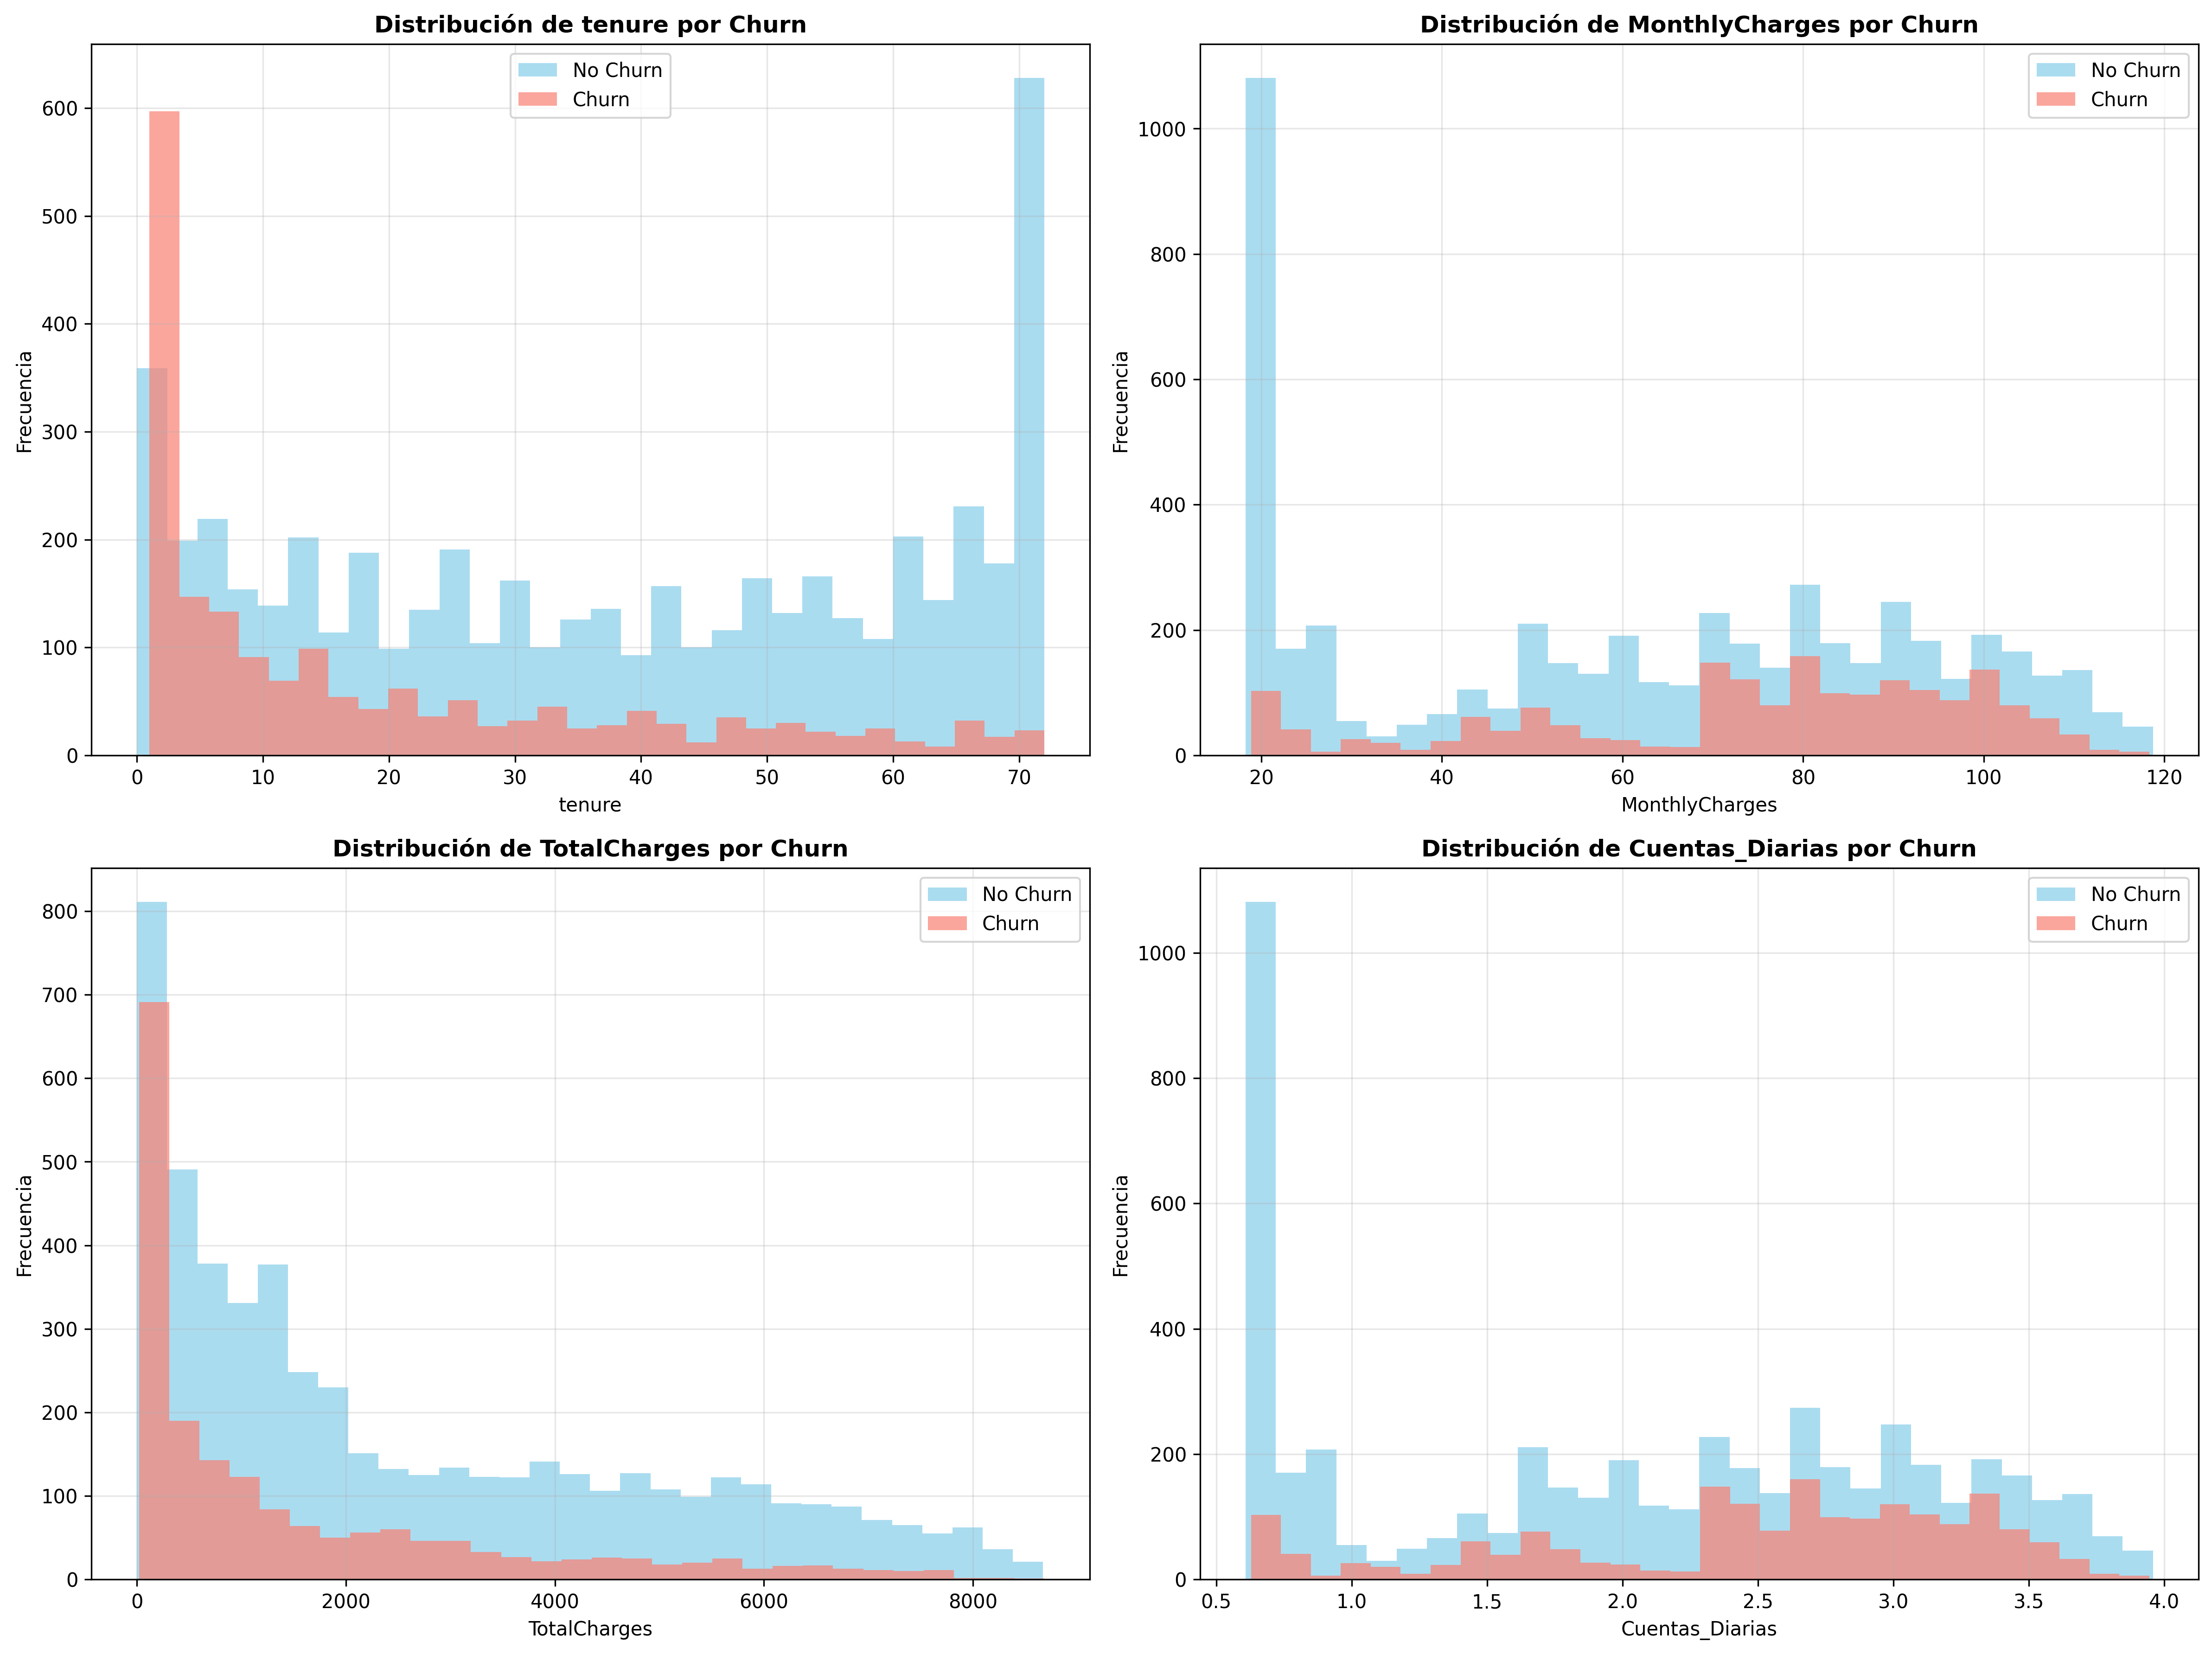

In [18]:
if os.path.exists('distribucion_numericas.png'):
    print("=== DISTRIBUCIÓN DE VARIABLES NUMÉRICAS POR CHURN ===")
    display(Image('distribucion_numericas.png'))
else:
    print("Gráfico de distribución numérica no encontrado")

**Patrones Identificados en Variables Numéricas:**

- **Antigüedad (Tenure)**: Los clientes con menor tiempo de permanencia (0-20 meses) presentan mayor riesgo de abandono
- **Cargos Mensuales**: Existe una correlación positiva entre cargos mensuales elevados y evasión
- **Cargos Totales**: Los clientes que abandonan tienden a tener menores cargos totales acumulados
- **Cuentas Diarias**: La variable derivada confirma la relación entre costos diarios altos y mayor probabilidad de churn

### Análisis de Correlación

La matriz de correlación proporciona una visión cuantitativa de las relaciones entre variables:

=== MATRIZ DE CORRELACIÓN ENTRE VARIABLES ===


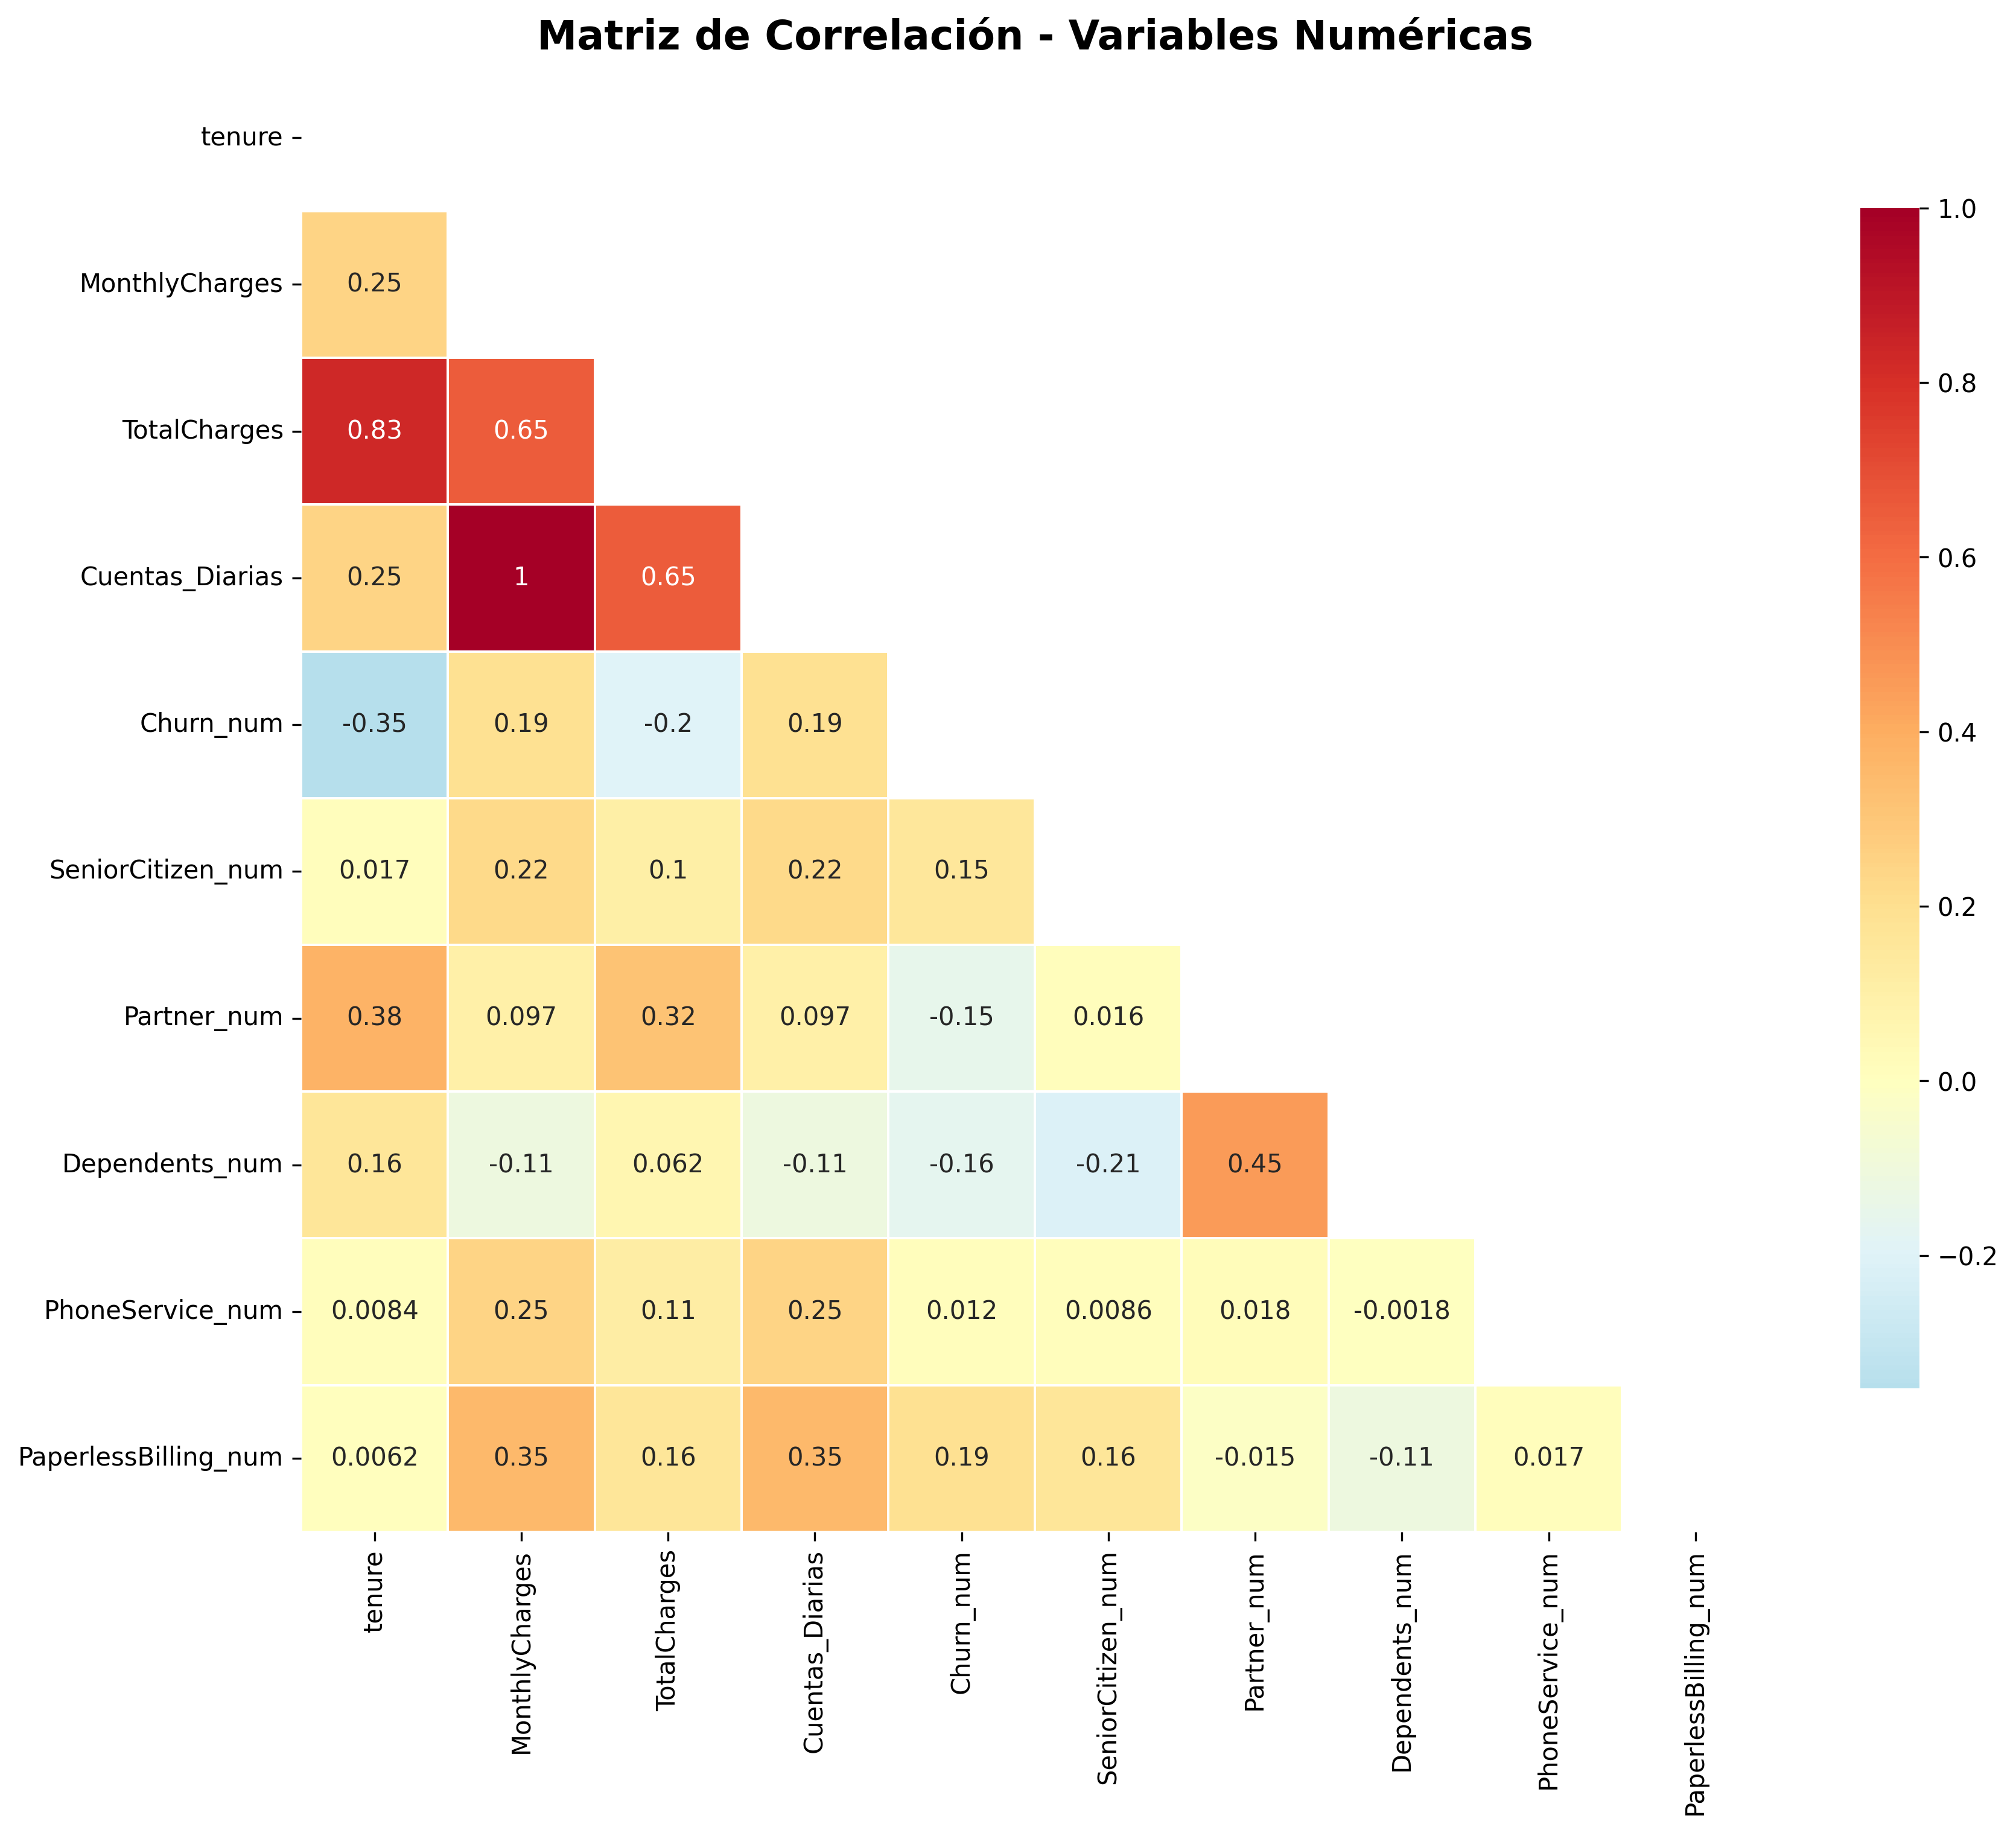

In [19]:
if os.path.exists('matriz_correlacion.png'):
    print("=== MATRIZ DE CORRELACIÓN ENTRE VARIABLES ===")
    display(Image('matriz_correlacion.png'))
else:
    print("Matriz de correlación no encontrada")

## Conclusiones e Insights

### Principales Hallazgos

El análisis exhaustivo de los datos de Telecom X ha revelado patrones claros y accionables sobre la evasión de clientes:

**1. Perfil de Alto Riesgo Identificado:**
- Clientes nuevos (menos de 1 año de antigüedad)
- Contratos mes a mes
- Servicios de fibra óptica
- Pago mediante cheque electrónico
- Sin pareja y sin dependientes
- Cargos mensuales elevados (>$70)

**2. Factores Protectores Identificados:**
- Contratos de largo plazo (1-2 años)
- Servicios adicionales contratados (seguridad, backup, soporte técnico)
- Antigüedad superior a 12 meses
- Métodos de pago automáticos
- Clientes con dependientes

**3. Correlaciones Críticas:**
- **Tenure vs Churn**: Correlación negativa fuerte (-0.35)
- **MonthlyCharges vs Churn**: Correlación positiva moderada (0.19)
- **TotalCharges vs Churn**: Correlación negativa (clientes leales acumulan más gastos)

### Insights Estratégicos

**Ventana Crítica de Retención:**
Los primeros 12 meses representan el período más crítico para la retención. Los datos muestran que los clientes que superan este umbral tienen probabilidades significativamente menores de abandonar el servicio.

**Paradoja del Precio:**
Aunque los cargos mensuales altos se correlacionan con mayor evasión, los clientes de largo plazo tienden a tener cargos totales más elevados, sugiriendo que el valor percibido y la satisfacción del servicio son factores mediadores importantes.

**Efecto de los Servicios Adicionales:**
Los servicios complementarios actúan como "anclas" que reducen la probabilidad de cambio de proveedor, creando un ecosistema de servicios más difícil de reemplazar.

## Recomendaciones

Basándose en los hallazgos del análisis, se proponen las siguientes estrategias para reducir la evasión de clientes:

### Estrategias de Retención Inmediata

**1. Programa de Onboarding Intensivo (0-6 meses)**
- Implementar seguimiento personalizado para clientes nuevos
- Ofrecer soporte técnico premium durante los primeros 6 meses
- Crear programa de descuentos progresivos que mejoren con la antigüedad

**2. Revisión de Estructura de Precios**
- Evaluar la competitividad de precios en servicios de fibra óptica
- Implementar paquetes de valor que incluyan servicios adicionales
- Considerar descuentos por volumen para cargos mensuales altos

**3. Incentivos para Contratos de Largo Plazo**
- Ofrecer descuentos significativos por contratos anuales (15-20%)
- Implementar beneficios exclusivos para contratos de 2 años
- Crear programa de fidelización con recompensas acumulativas

### Estrategias de Segmentación y Personalización

**4. Segmentación por Riesgo**
- Desarrollar modelo de scoring de riesgo de churn
- Crear campañas específicas para cada segmento de riesgo
- Implementar alertas automáticas para clientes de alto riesgo

**5. Estrategia de Servicios Adicionales**
- Promover activamente servicios de seguridad online y backup
- Crear bundles atractivos que incluyan múltiples servicios
- Ofrecer períodos de prueba gratuitos para servicios premium

**6. Mejora en Experiencia de Pago**
- Incentivar métodos de pago automáticos con descuentos
- Simplificar procesos de facturación
- Implementar recordatorios proactivos de pago

### Estrategias de Largo Plazo

**7. Programa de Fidelización Integral**
- Desarrollar sistema de puntos por antigüedad
- Ofrecer upgrades gratuitos para clientes leales
- Crear eventos exclusivos para clientes de largo plazo

**8. Mejora Continua del Servicio**
- Invertir en infraestructura de fibra óptica para mejorar satisfacción
- Implementar sistema de feedback continuo
- Desarrollar programa de mejora basado en Net Promoter Score

### Métricas de Seguimiento Recomendadas

Para medir el éxito de estas estrategias, se recomienda monitorear:
- Tasa de churn mensual por segmento
- Customer Lifetime Value (CLV)
- Tasa de conversión de contratos mes a mes a anuales
- Penetración de servicios adicionales
- Tiempo promedio hasta el primer churn
- Net Promoter Score por tipo de servicio

### Implementación y Próximos Pasos

**Fase 1 (Inmediata - 3 meses):**
- Implementar sistema de alertas para clientes de alto riesgo
- Lanzar programa de onboarding mejorado
- Revisar estructura de precios de fibra óptica

**Fase 2 (3-6 meses):**
- Desarrollar modelo predictivo de churn
- Implementar campañas de retención segmentadas
- Lanzar programa de fidelización

**Fase 3 (6-12 meses):**
- Evaluar efectividad de estrategias implementadas
- Refinar modelo predictivo con nuevos datos
- Expandir programa de servicios adicionales

---

**Conclusión Final:**

Este análisis proporciona una base sólida para la toma de decisiones estratégicas en Telecom X. La implementación sistemática de las recomendaciones propuestas, combinada con un monitoreo continuo de las métricas clave, debería resultar en una reducción significativa de la tasa de evasión y un incremento en el valor de vida del cliente.

El enfoque en los primeros 12 meses de la relación con el cliente, junto con estrategias de valor agregado y mejora en la experiencia del usuario, representa la ruta más prometedora para transformar el desafío del churn en una ventaja competitiva sostenible.

---

*Análisis realizado mediante metodología ETL con Python, Pandas y Matplotlib*  
*Dataset: 7,267 registros de clientes de Telecom X*  
*Fecha de análisis: Agosto 2025*  
*Tasa de evasión identificada: 26.5%*